In [1]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial import Delaunay

Consts

In [2]:
colormap = 'rainbow'
colour = ['black', 'gray', 'red', 'orange', 'green', 'slateblue',
            'sandybrown', 'lightpink', 'hotpink', 'gold']
sampling_size = 34

In [3]:
data = pd.read_json('C:\\Users\\talro\\OneDrive\\Documents\\tentacle1-10points.json')

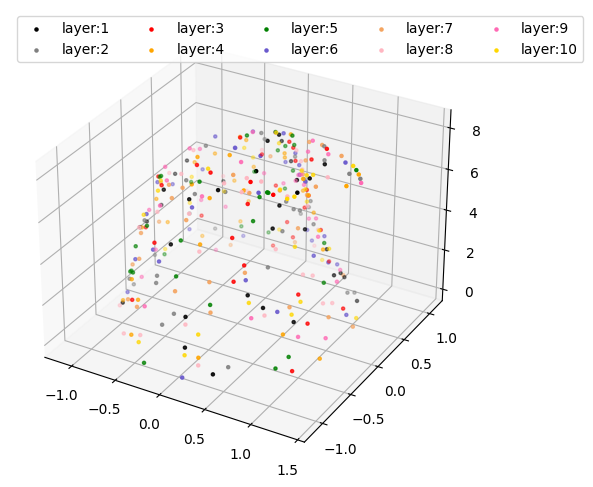

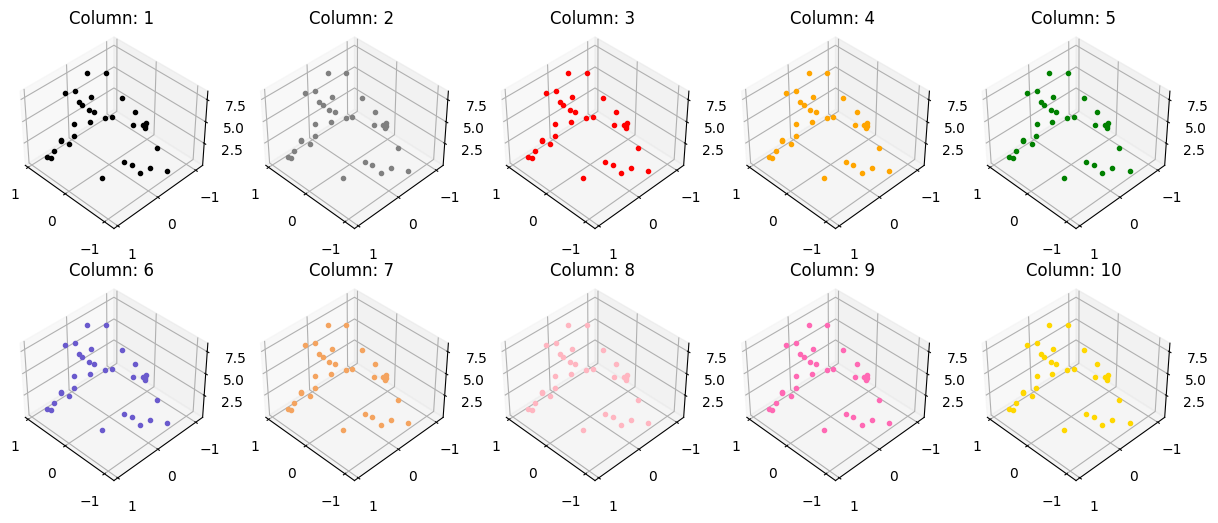

In [4]:
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
fig1 = plt.figure(figsize=(15,6))
x_lst = []
y_lst = []
z_lst = []
vals = []
legend = []
j = 0
for index in data:
    figure = []
    ax1 = fig1.add_subplot(2, 5, j+1, projection='3d')
    for i in data[index]:
        figure.append(i)
    xline = [i[0] for i in figure]
    yline = [i[1] for i in figure]
    zline = [i[2] for i in figure]
    for k in figure:
        x_lst.append(k[0])
        y_lst.append(k[1])

        vals.append([k[0], k[1], k[2]])
        z_lst.append(k[2])

    for point in range(sampling_size):
        # ax1.plot(xline[point], yline[point], zline[point], marker='.', color=colour[j])
        ax1.plot(x_lst[point], y_lst[point], z_lst[point], marker='.', color=colour[j])
        ax1.set_title("Column: " + str(j+1))
    legend.append("layer:" + str(j+1))
    ax1.view_init(40, 135)
    ax.scatter3D(x_lst[j*sampling_size:j*sampling_size+sampling_size], y_lst[j*sampling_size:j*sampling_size+sampling_size], z_lst[j*sampling_size:j*sampling_size+sampling_size], marker='.', color=colour[j])
    ax.legend(legend, loc="upper left", ncol=int((len(legend)+1)/2))
    
    j+=1


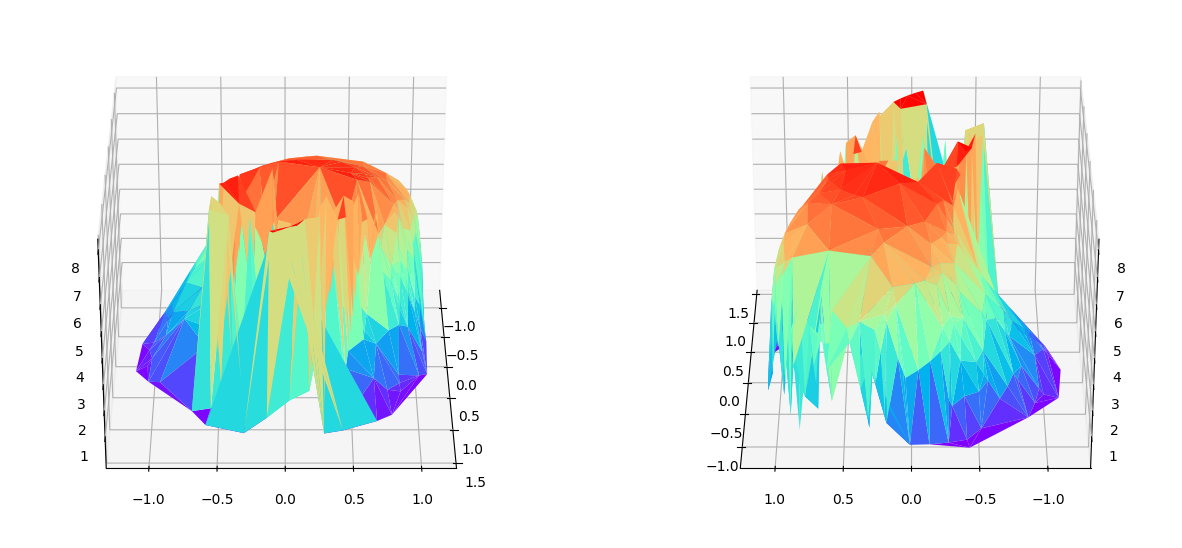

In [12]:
# Default triangulation
z_unique_values = np.unique(z_lst)
tr = Delaunay(vals, furthest_site=True)
fig2 = plt.figure(figsize=(15, 8))
ax2 = fig2.add_subplot(1, 2, 1, projection='3d')
ax2.plot_trisurf(x_lst, y_lst, z_lst, triangles=tr.simplices, cmap=colormap)
ax2.view_init(30, 0)
ax3 = fig2.add_subplot(1, 2, 2, projection='3d')
ax3.plot_trisurf(x_lst, y_lst, z_lst, triangles=tr.simplices, cmap=colormap)
ax3.view_init(30, 180)

In [ ]:
def circle_radius_and_center(p1, p2, p3):
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3
    # x1, y1, x2, y2, x3, y3 = map(float, input().split())
    c = (x1 - x2) ** 2 + (y1 - y2) ** 2
    a = (x2 - x3) ** 2 + (y2 - y3) ** 2
    b = (x3 - x1) ** 2 + (y3 - y1) ** 2
    s = 2 * (a * b + b * c + c * a) - (a * a + b * b + c * c)
    px = (a * (b + c - a) * x1 + b * (c + a - b) * x2 + c * (a + b - c) * x3) / s
    py = (a * (b + c - a) * y1 + b * (c + a - b) * y2 + c * (a + b - c) * y3) / s
    ar = a ** 0.5
    br = b ** 0.5
    cr = c ** 0.5
    r = ar * br * cr / ((ar + br + cr) * (-ar + br + cr) * (ar - br + cr) * (ar + br - cr)) ** 0.5
    return r, (px, py)

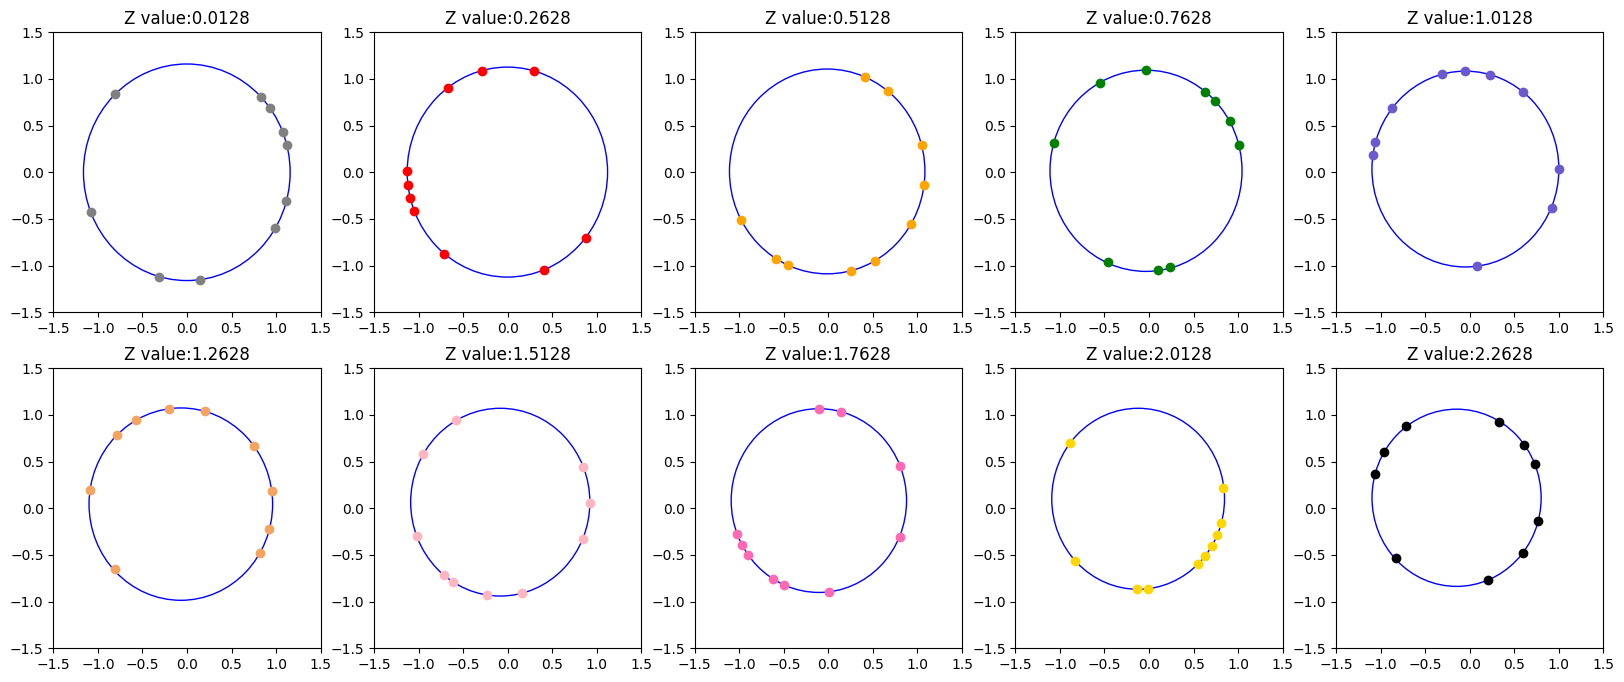

In [ ]:
vals = np.array(vals)
z_unique_values = np.unique(vals[:, 2])

ticks = [-1.5, -1, -0.5, 0, 0.5, 1, 1.5]
k = 1
rads = []
fig = plt.figure(figsize=(20,8))
for layer in z_unique_values[:10]:
    ax = fig.add_subplot(2, 5, k)
    relevant_points = vals[vals[:, 2] == layer][:, :2]
    if len(relevant_points) > 3:
        r, center = circle_radius_and_center(relevant_points[0], relevant_points[1], relevant_points[2])
        circle = plt.Circle(center, r, fill=False, color='blue')
        rads.append(r)
        ax.add_patch(circle)
        ax.set_title("Z value:" + str(round(layer, 4)))

    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.scatter(relevant_points[:, 0], relevant_points[:, 1], color=colour[k%len(colour)])
    k += 1


plt.show()